<a href="https://colab.research.google.com/github/krithikaceg/functional_intro_to_python/blob/master/Classification_of_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classification of Digits 

In [0]:
import numpy as np
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.utils import shuffle

from yellowbrick.classifier import ConfusionMatrix

### Ingest

In [0]:
# The digits dataset
digits = datasets.load_digits()

### EDA

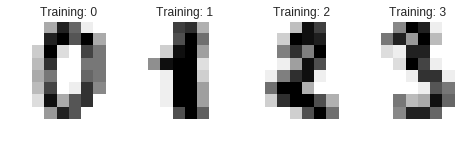

In [113]:
# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)


In [114]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [115]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

number_of_digits_to_predict = 8

# We are shuffling data, images, target
#X, images, y = shuffle(data, digits.images, digits.target, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.33, random_state=42)
classifier.fit(X_train, y_train)

# Now predict the value of the digit on the second half:
expected = y_test
predicted = classifier.predict(X_test)

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))



Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       0.98      1.00      0.99        55
           2       1.00      1.00      1.00        52
           3       0.98      0.96      0.97        56
           4       1.00      1.00      1.00        64
           5       0.99      1.00      0.99        73
           6       1.00      1.00      1.00        57
           7       0.98      0.98      0.98        62
           8       0.98      0.98      0.98        52
           9       0.99      0.97      0.98        68

   micro avg       0.99      0.99      0.99       594
   macro avg       0.99      0.99      0.99       594
weighted avg       0.99      0.99 

In [52]:
print(classifier.score(X_test, y_test))

0.98989898989899


### Using Neural Networks

In [0]:
import tensorflow as tf
x_train, x_test, y_train, y_test = train_test_split(digits.images, digits.target, test_size=0.33, random_state=42)

In [0]:
import matplotlib.pyplot as plt
#%matplotlib inline # Only use this if using iPython
image_index = 77 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [117]:
print(x_train[0])
print(x_train.shape)
print(type(x_train))

[[ 0.  0.  0.  1. 12.  7.  0.  0.]
 [ 0.  0.  0.  9. 16. 16.  1.  0.]
 [ 0.  1.  7. 15. 16. 14.  0.  0.]
 [ 0.  4. 16. 16. 16. 16.  0.  0.]
 [ 0.  0.  0.  3. 16. 16.  0.  0.]
 [ 0.  0.  0.  2. 16. 16.  3.  0.]
 [ 0.  0.  0.  6. 16. 16.  0.  0.]
 [ 0.  0.  0.  3. 15. 13.  0.  0.]]
(1203, 8, 8)
<class 'numpy.ndarray'>


In [123]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 8, 8, 1)
x_test = x_test.reshape(x_test.shape[0], 8, 8, 1)
input_shape = (8, 8, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (1203, 8, 8, 1)
Number of images in x_train 1203
Number of images in x_test 594


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [125]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1203/1203 [==============================] - 1s 523us/step - loss: 2.2857 - acc: 0.3267
Epoch 2/10
1203/1203 [==============================] - 0s 143us/step - loss: 2.2052 - acc: 0.5353
Epoch 3/10
1203/1203 [==============================] - 0s 133us/step - loss: 1.9904 - acc: 0.5786
Epoch 4/10
1203/1203 [==============================] - 0s 125us/step - loss: 1.6135 - acc: 0.6958
Epoch 5/10
1203/1203 [==============================] - 0s 129us/step - loss: 1.2256 - acc: 0.7731
Epoch 6/10
1203/1203 [==============================] - 0s 133us/step - loss: 0.9192 - acc: 0.8188
Epoch 7/10
1203/1203 [==============================] - 0s 131us/step - loss: 0.7163 - acc: 0.8479
Epoch 8/10
1203/1203 [==============================] - 0s 131us/step - loss: 0.5996 - acc: 0.8645
Epoch 9/10
1203/1203 [==============================] - 0s 125us/step - loss: 0.5056 - acc: 0.8886
Epoch 10/10
1203/1203 [==============================] - 0s 134us/step - loss: 0.4558 - acc: 0.8928


In [126]:
model.evaluate(x_test, y_test)

594/594 [==============================] - 0s 187us/step


[0.38634405734161736, 0.9124579120565344]

TypeError: ignored

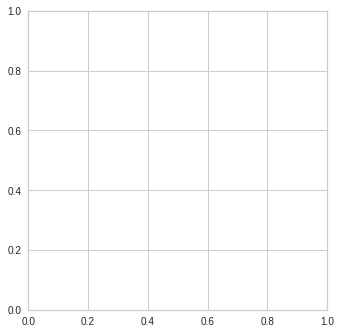

In [128]:
image_index = 444
x_test.reshape(x_test.shape[0], 8, 8)
plt.imshow(x_test[image_index],cmap='Greys')
pred = model.predict(x_test[image_index])
print(pred.argmax())